In [1]:
%matplotlib inline

In [2]:
%load_ext autoreload
%autoreload 2

In [4]:
import matplotlib.pyplot as plt

1928 1932
      snp500    3mon    10yr
year                        
1928  0.4381  0.0308  0.0084
1929 -0.0830  0.0316  0.0420
1930 -0.2512  0.0455  0.0454
1931 -0.4384  0.0231 -0.0256
1932 -0.0864  0.0107  0.0879
             0         1         2
1928  0.438100  0.030800  0.008400
1929  0.318738  0.063373  0.050753
1930 -0.012529  0.111757  0.098457
1931 -0.445436  0.137438  0.070336
1932 -0.493351  0.149609  0.164419


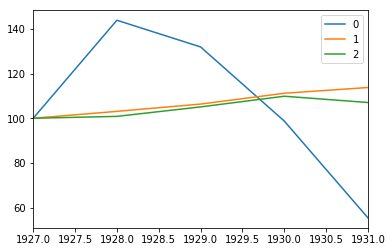

1933 1937
      snp500    3mon    10yr
year                        
1933  0.4998  0.0096  0.0186
1934 -0.0119  0.0032  0.0796
1935  0.4674  0.0018  0.0447
1936  0.3194  0.0017  0.0502
1937 -0.3534  0.0030  0.0138
             0         1         2
1933  0.499800  0.009600  0.018600
1934  0.481952  0.012831  0.099681
1935  1.174617  0.014654  0.148836
1936  1.869190  0.016379  0.206508
1937  0.855218  0.019428  0.223158


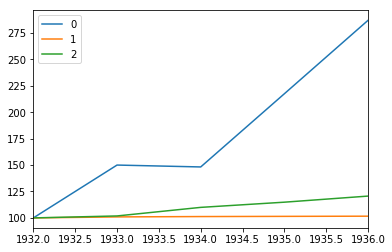

1938 1942
      snp500    3mon    10yr
year                        
1938  0.2928  0.0008  0.0421
1939 -0.0110  0.0004  0.0441
1940 -0.1067  0.0003  0.0540
1941 -0.1277  0.0008 -0.0202
1942  0.1917  0.0034  0.0229
             0         1         2
1938  0.292800  0.000800  0.042100
1939  0.278579  0.001200  0.088057
1940  0.142155  0.001501  0.146812
1941 -0.003698  0.002302  0.123646
1942  0.187293  0.005710  0.149378


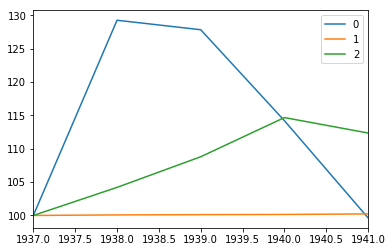

1943 1947
      snp500    3mon    10yr
year                        
1943  0.2506  0.0038  0.0249
1944  0.1903  0.0038  0.0258
1945  0.3582  0.0038  0.0380
1946 -0.0843  0.0038  0.0313
1947  0.0520  0.0057  0.0092
             0         1         2
1943  0.250600  0.003800  0.024900
1944  0.488589  0.007614  0.051342
1945  1.021802  0.011443  0.091293
1946  0.851364  0.015287  0.125451
1947  0.947635  0.021074  0.135805


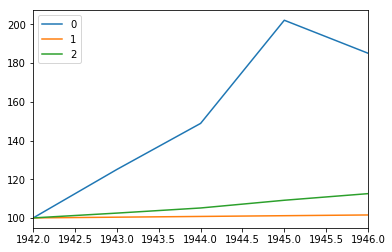

1948 1952
      snp500    3mon    10yr
year                        
1948  0.0570  0.0102  0.0195
1949  0.1830  0.0110  0.0466
1950  0.3081  0.0117  0.0043
1951  0.2368  0.0148 -0.0030
1952  0.1815  0.0167  0.0227
             0         1         2
1948  0.057000  0.010200  0.019500
1949  0.250431  0.021312  0.067009
1950  0.635689  0.033262  0.071597
1951  1.023020  0.048554  0.068382
1952  1.390198  0.066065  0.092634


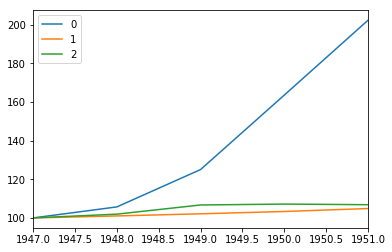

1953 1957
      snp500    3mon    10yr
year                        
1953 -0.0121  0.0189  0.0414
1954  0.5256  0.0096  0.0329
1955  0.3260  0.0166 -0.0134
1956  0.0744  0.0256 -0.0226
1957 -0.1046  0.0323  0.0680
             0         1         2
1953 -0.012100  0.018900  0.041400
1954  0.507140  0.028681  0.075662
1955  0.998468  0.045758  0.061248
1956  1.147154  0.072529  0.037264
1957  0.922562  0.107172  0.107798


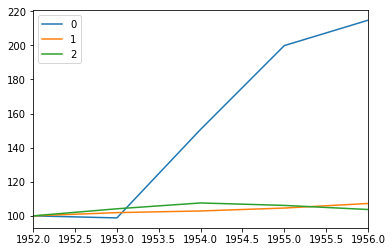

1958 1962
      snp500    3mon    10yr
year                        
1958  0.4372  0.0178 -0.0210
1959  0.1206  0.0326 -0.0265
1960  0.0034  0.0305  0.1164
1961  0.2664  0.0227  0.0206
1962 -0.0881  0.0278  0.0569
             0         1         2
1958  0.437200  0.017800 -0.021000
1959  0.610526  0.050980 -0.046944
1960  0.616002  0.083035  0.063992
1961  1.046505  0.107620  0.085911
1962  0.866208  0.138412  0.147699


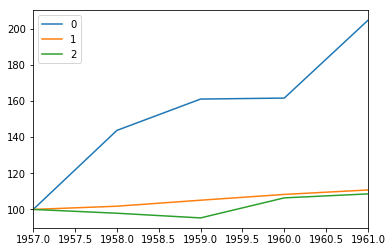

1963 1967
      snp500    3mon    10yr
year                        
1963  0.2261  0.0311  0.0168
1964  0.1642  0.0351  0.0373
1965  0.1240  0.0390  0.0072
1966 -0.0997  0.0484  0.0291
1967  0.2380  0.0433 -0.0158
             0         1         2
1963  0.226100  0.031100  0.016800
1964  0.427426  0.067292  0.054727
1965  0.604426  0.108916  0.062321
1966  0.444465  0.162588  0.093234
1967  0.788248  0.212928  0.075961


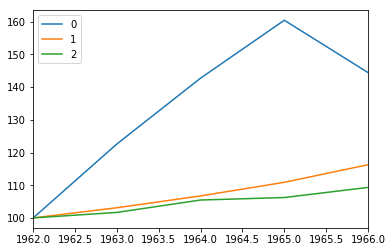

1968 1972
      snp500    3mon    10yr
year                        
1968  0.1081  0.0526  0.0327
1969 -0.0824  0.0656 -0.0501
1970  0.0356  0.0669  0.1675
1971  0.1422  0.0454  0.0979
1972  0.1876  0.0395  0.0282
             0         1         2
1968  0.108100  0.052600  0.032700
1969  0.016793  0.121651 -0.019038
1970  0.052990  0.196689  0.145273
1971  0.202726  0.251019  0.257395
1972  0.428357  0.300434  0.292854


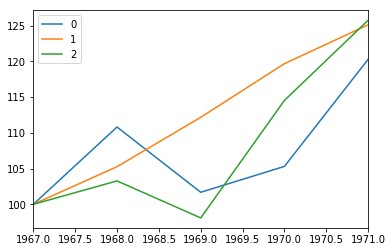

1973 1977
      snp500    3mon    10yr
year                        
1973 -0.1431  0.0673  0.0366
1974 -0.2590  0.0778  0.0199
1975  0.3700  0.0599  0.0361
1976  0.2383  0.0497  0.1598
1977 -0.0698  0.0513  0.0129
             0         1         2
1973 -0.143100  0.067300  0.036600
1974 -0.365037  0.150336  0.057228
1975 -0.130101  0.219241  0.095394
1976  0.077196  0.279837  0.270438
1977  0.002008  0.345493  0.286827


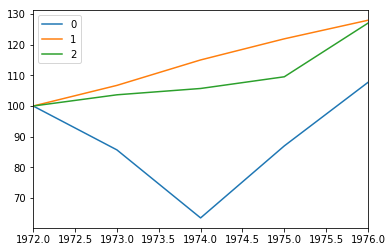

1978 1982
      snp500    3mon    10yr
year                        
1978  0.0651  0.0693 -0.0078
1979  0.1852  0.0994  0.0067
1980  0.3174  0.1122 -0.0299
1981 -0.0470  0.1430  0.0820
1982  0.2042  0.1101  0.3281
             0         1         2
1978  0.065100  0.069300 -0.007800
1979  0.262357  0.175588 -0.001152
1980  0.663028  0.307489 -0.031018
1981  0.584866  0.494460  0.048439
1982  0.908496  0.659001  0.392431


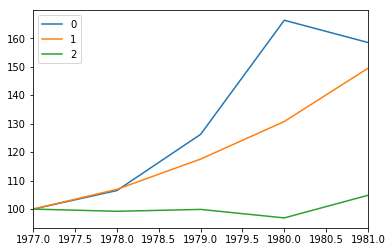

1983 1987
      snp500    3mon    10yr
year                        
1983  0.2234  0.0845  0.0320
1984  0.0615  0.0961  0.1373
1985  0.3124  0.0749  0.2571
1986  0.1849  0.0604  0.2428
1987  0.0581  0.0572 -0.0496
             0         1         2
1983  0.223400  0.084500  0.032000
1984  0.298639  0.188720  0.173694
1985  0.704334  0.277756  0.475450
1986  1.019465  0.354932  0.833690
1987  1.136796  0.432434  0.742739


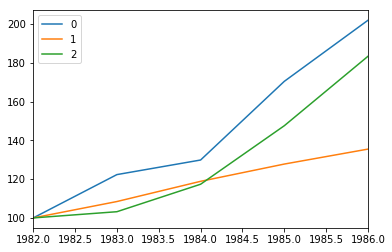

1988 1992
      snp500    3mon    10yr
year                        
1988  0.1654  0.0645  0.0822
1989  0.3148  0.0811  0.1769
1990 -0.0306  0.0755  0.0624
1991  0.3023  0.0561  0.1500
1992  0.0749  0.0341  0.0936
             0         1         2
1988  0.165400  0.064500  0.082200
1989  0.532268  0.150831  0.273641
1990  0.485381  0.237719  0.353116
1991  0.934411  0.307155  0.556084
1992  1.079298  0.351729  0.701733


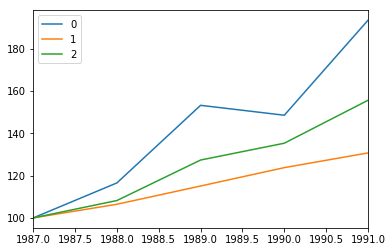

1993 1997
      snp500    3mon    10yr
year                        
1993  0.0997  0.0298  0.1421
1994  0.0133  0.0399 -0.0804
1995  0.3720  0.0552  0.2348
1996  0.2268  0.0502  0.0143
1997  0.3310  0.0505  0.0994
             0         1         2
1993  0.099700  0.029800  0.142100
1994  0.114326  0.070889  0.050275
1995  0.528855  0.130002  0.296880
1996  0.875600  0.186728  0.315425
1997  1.496423  0.246658  0.446178


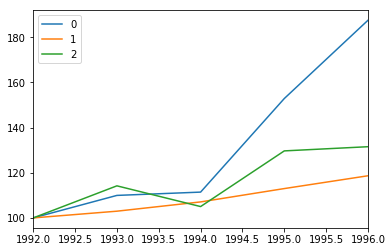

1998 2002
      snp500    3mon    10yr
year                        
1998  0.2834  0.0473  0.1492
1999  0.2089  0.0451 -0.0825
2000 -0.0903  0.0576  0.1666
2001 -0.1185  0.0367  0.0557
2002 -0.2197  0.0166  0.1512
             0         1         2
1998  0.283400  0.047300  0.149200
1999  0.551502  0.094533  0.054391
2000  0.411402  0.157578  0.230053
2001  0.244151  0.200061  0.298566
2002 -0.029189  0.219982  0.494910


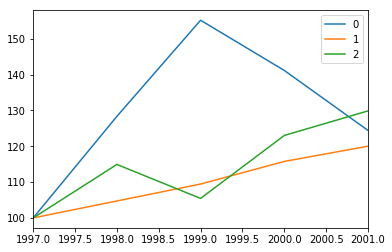

2003 2007
      snp500    3mon    10yr
year                        
2003  0.2836  0.0103  0.0038
2004  0.1074  0.0123  0.0449
2005  0.0483  0.0301  0.0287
2006  0.1561  0.0468  0.0196
2007  0.0548  0.0464  0.1021
             0         1         2
2003  0.283600  0.010300  0.003800
2004  0.421459  0.022727  0.048871
2005  0.490115  0.053511  0.078973
2006  0.722722  0.102815  0.100121
2007  0.817127  0.153986  0.212443


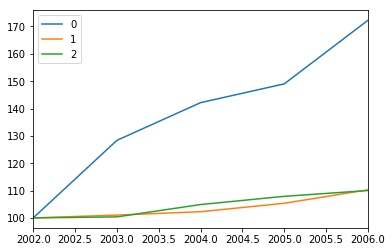

2008 2012
      snp500    3mon    10yr
year                        
2008 -0.3655  0.0159  0.2010
2009  0.2594  0.0014 -0.1112
2010  0.1482  0.0013  0.0846
2011  0.0210  0.0003  0.1604
2012  0.1589  0.0005  0.0297
             0         1         2
2008 -0.365500  0.015900  0.201000
2009 -0.200911  0.017322  0.067449
2010 -0.082486  0.018645  0.157755
2011 -0.063218  0.018950  0.343459
2012  0.085637  0.019460  0.383360


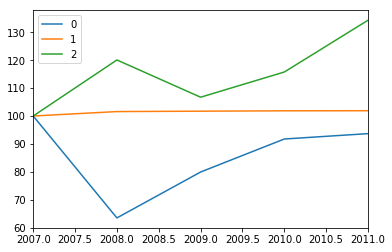

<Figure size 432x288 with 0 Axes>

In [10]:
%run mvp.py